# TAOS0 drifter deployments: schedule route for drifter deployments


In [4]:
import os
from glob import glob

from datetime import datetime
from time import sleep

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import pyproj

import taos.utils as ut
import taos.insitu as ins
from taos.insitu import rad2deg, knot, _lonc, _latc
lonc, latc  = _lonc, _latc

---

## useful metrics

In [5]:
ins.metrics_cheatsheet(lonc, latc)

 lon: 1 deg = 72.44km,  0.1 deg = 7.2km,  0.01 deg = 724.4m,  0.001 deg = 72.4m
 lon: 1 deg = 72.44km,  1 min = 1207.3m,  .1 min = 120.7m,  0.01 min = 12.1m
 lon: 1 deg = 72.44km,  1 sec = 20.1m,  .1 sec = 2.0m
-----------------------------------------------------------------
 lat: 1 deg = 111.23km,  0.1 deg = 11.1km,  0.01 deg = 1112.2m,  0.001 deg = 111.2m
 lat: 1 deg = 111.23km,  1 min = 1853.7m,  .1 min = 185.4m,  0.01 min = 18.5m
 lat: 1 deg = 111.23km,  1 sec = 30.9m,  .1 sec = 3.1m


🐷🐷🐷🐷🐨🌼🌼🌼💐💐🌾🌖🌾😋😋👩‍🦳👩‍🦳§😄😁😁😁😀😄😄(😃😄(😚😚😗)🙃😇😇😇😇🥳🥳😏🥳🥳😏🥳😏🥳)😡😡😡😡😡😡👹👹👹👺👺👺👾👽👾😿😿😿😸😹👍🖐🏻👉🏽👀👥👥👥👥👥👥👥🧑🏽‍🦰🧑🏽‍🦰👱‍♂️👱‍♂️👱‍♂️👱‍♂️😡🤕à🤕🤕🤒😷

---

## drifter deployment route

In [79]:
theta = 0/rad2deg

In [88]:
# deployment geometry

R = 1e3

# set anchor
anchor = ins.stations.loc["LSTOuistreham"]
lon_a, lat_a = anchor["lon"], anchor["lat"]
x_a, y_a = ins.ll2xy(lon_a, lat_a)

# other variables
speed = 10 # knots
time_waiting = 5*60 # seconds

In [89]:
# build radiator manually
ds = R/np.sqrt(2)
dX = ds*np.array([0, -1-1j, -1-1j, -1+1j, 1+1j, 1+1j, -1+1j, -1-1j, -1-1j])
X = np.cumsum(dX)

X = X*np.exp(1j*theta)

In [91]:
np.abs(dX)

array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.])

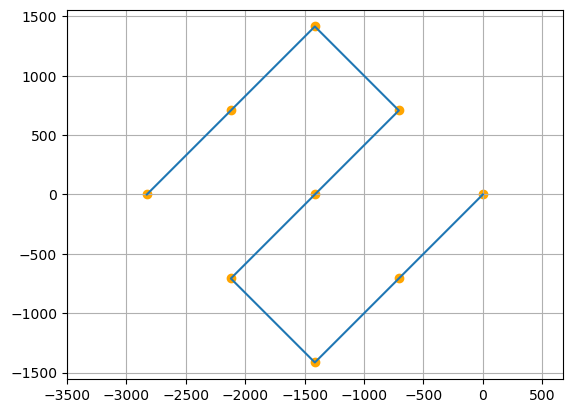

In [90]:
# visual check
plt.plot(X.real, X.imag)
plt.scatter(X.real, X.imag, color="orange")
plt.axis("equal")
plt.grid()

In [92]:
# compute actual positions
x, y = x_a+X.real, y_a+X.imag
lon, lat = ins.xy2ll(x, y)
#lon, lat

(array([-0.246754  , -0.2565026 , -0.26624869, -0.2759603 , -0.2662142 ,
        -0.25646559, -0.26617969, -0.27592831, -0.28567442]),
 array([49.340379  , 49.33403358, 49.32768733, 49.33405614, 49.3404032 ,
        49.34674943, 49.35311904, 49.346772  , 49.34042412]))

**drifter 4 is center and needs to be doubled**

In [93]:
dash = ins.dashboard_route(lon, lat, ship_speed=speed, time_waiting=time_waiting/60)
dash.grid

Output()

/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds dur

GridspecLayout(children=(Button(description='Update', icon='check', layout=Layout(grid_area='widget001'), styl…

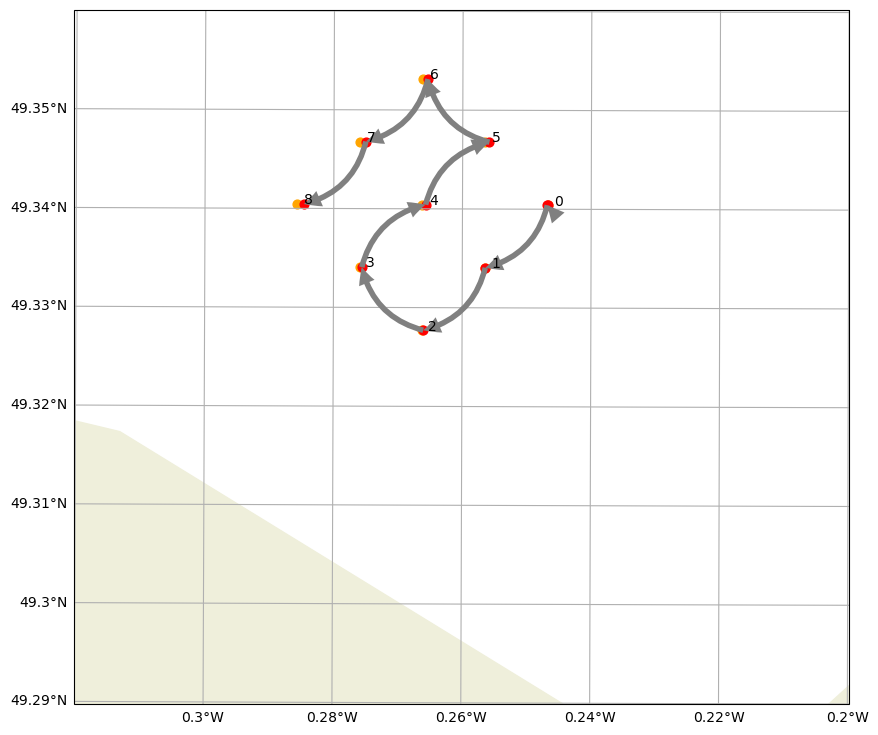

In [94]:
ins.plot_deployments_route(dash.lon_vertices, dash.lat_vertices, dash.df, 
                           bathy=False, land=dict(scale="10m"), coast_resolution=None,
                          );

### Extract current speed and direction from dashboard

In [7]:
U = dash.w["current_speed_x"].value + 1j*dash.w["current_speed_y"].value
#U = 1. + 1j*1. # dev
U_theta = np.angle(U)
U_amplitude = np.abs(U)
print(f" theta={U_theta:.2f} rad = {U_theta*rad2deg:.2f} deg, abs(U) = {U_amplitude:.2f} m/s")

 theta=-0.31 rad = -17.88 deg, abs(U) = 0.65 m/s


In [8]:
# set rotation angle to current direction
theta = U_theta

⛷⛷⛷⛷⛹️‍♂️🛹🥌🥶🥶🎽
😀😀😔😔🥳🥳🥳🥳
🤩😞
😨🥵🤬⚽️🏀🏈⚾️🥎🎾🎾🏐🥏
